In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edsa-sentiment-classification/sample_submission.csv
/kaggle/input/edsa-sentiment-classification/train.csv
/kaggle/input/edsa-sentiment-classification/test.csv


To begin with, we will import all the relevant libraries
In building this model, we will be using libraries for the following purposes
- Data Cleaning
- Exploratory Data Analysis
- Natural Language Toolkit
- Mathematical functions
- Data Processing
- Model Building
- Plotting


In [2]:
#Collecting the relevant imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

#Defining the NLTK Variables
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
stopwords_list = stopwords.words('english')

#importing all models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


We will then need to connect to the data sets, and create Pandas data frames from the data

In [3]:
#Creating data frames for the train and test data sets
df_train = pd.read_csv('/kaggle/input/edsa-sentiment-classification/train.csv')
df_tr = df_train.copy()
df_test = pd.read_csv('/kaggle/input/edsa-sentiment-classification/test.csv')
df_te = df_test.copy()

Once connected to the data, we should do analysis to ensure that the data is fit for purpose.
Some of the checks that we are doing are as follows:
- The properties of the train and test data
- Viewing the actual Data
- Cheking for duplicate data


In [4]:
#Fetching information of the train table
df_train.info()
print(df_train.shape)
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB
(15819, 3)


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
#Fetching information of the test table
df_test.info()
print(df_test.shape)
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB
(10546, 2)


,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [6]:
#Testing the amount of duplicates in the train data
message_dup_count = df_tr['message'].value_counts()
print ('-- There are ' + str(df_tr['message'].nunique()) + ' unique records in the message column')
print ('-- The value counts of data in the message column is as follows: ')
print(message_dup_count)

-- There are 14229 unique records in the message column
-- The value counts of data in the message column is as follows: 
RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦    307
RT @SenSanders: We have a president-elect who doesn't believe in climate change. Millions of people are going to have to say: Mr. TÃ¢â‚¬Â¦            130
RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦     73
RT @BernieSanders: #ImVotingBecause the future of the planet is at stake. Hillary Clinton will combat climate change. Donald Trump thinks iÃ¢â‚¬Â¦     59
RT @SethMacFarlane: HRC proposes installing half a billion solar panels by the end of her first term. Trump thinks climate change is a hoaxÃ¢â‚¬Â¦     56
                                                                                                            

From the investigation above, we noticed that there are quite a few duplicates. 
To start off the data cleansing process, we would firstly remove all duplicates


In [7]:
print('The Shape of the train data before removing duplicates')
print(df_tr.shape)
#Code to drop duplicates
df_tr = df_tr.drop_duplicates(subset = 'message' , keep = 'first')
print('The Shape of the train data after removing duplicates')
print(df_tr.shape)
df_tr.head()



The Shape of the train data before removing duplicates
(15819, 3)
The Shape of the train data after removing duplicates
(14229, 3)


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


We also noticed that there was a lot of noise in the data. Noise refers to unneccessary information, such as:
- @
- WebUrls
- Extra WhiteSpace
- Lower case 
- Remove all other special characters

We using a concept called regular expression to remove the noise, so that when the data is modelled, it is in a "cleaner" state, to make better predictions.





In [8]:

# Remove special characters   
df_tr['message'] = df_tr['message'].str.replace('[^\w\s]','')  
# Remove RT
df_tr['message'] = df_tr['message'].str.replace('RT','')  
# Remove url's
df_tr['message'] =  df_tr['message'].str.replace(r'https?:\/\/.*\/\w*', '')
# Remove hashtags
#df_tr['message'] = re.sub(r'#\w*', '', df_tr['message'])    
# Remove numbers
df_tr['message'] =  df_tr['message'].str.replace(r'\d+', '')  
# Remove extra whitespace
df_tr['message'] =  df_tr['message'].str.replace(r'\s\s+', ' ')
# Remove space in front of tweet
df_tr['message'] = df_tr['message'].str.lstrip(' ')     
# Convert everything to lowercase
df_tr['message'] = df_tr['message'].str.lower()

df_tr.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == "":


,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rawstory researchers say we have three years t...,698562
3,1,todayinmaker wired was a pivotal year in the w...,573736
4,1,soynoviodetodas its and a racist sexist climat...,466954


The next step in the data preparation process would be to Tokenize the data. The process of Tokenizing is dividing text in to a sequence of tokens, which enables readiness for modelling

In [9]:
#Instantiating the tokenizer, and creating a new column to the df with the tokenized words in a list
tkn = TreebankWordTokenizer()
df_tr['tokens'] = df_tr['message'].apply(tkn.tokenize)
df_tr.head()

,sentiment,message,tweetid,tokens
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr..."
2,2,rawstory researchers say we have three years t...,698562,"[rawstory, researchers, say, we, have, three, ..."
3,1,todayinmaker wired was a pivotal year in the w...,573736,"[todayinmaker, wired, was, a, pivotal, year, i..."
4,1,soynoviodetodas its and a racist sexist climat...,466954,"[soynoviodetodas, its, and, a, racist, sexist,..."


Root words are always easier to model, as it batches a few words into a single category. We use the process of stemming to convert words in to the root word

In [10]:
#Instantiating the stemmer, and creating a new column in the df with all of the root values
stemmer = SnowballStemmer('english')
def word_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

df_tr['Stemmed'] = df_tr['tokens'].apply(word_stemmer,args=(stemmer,))
df_tr.head()

,sentiment,message,tweetid,tokens,Stemmed
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge..."
2,2,rawstory researchers say we have three years t...,698562,"[rawstory, researchers, say, we, have, three, ...","[rawstori, research, say, we, have, three, yea..."
3,1,todayinmaker wired was a pivotal year in the w...,573736,"[todayinmaker, wired, was, a, pivotal, year, i...","[todayinmak, wire, was, a, pivot, year, in, th..."
4,1,soynoviodetodas its and a racist sexist climat...,466954,"[soynoviodetodas, its, and, a, racist, sexist,...","[soynoviodetoda, it, and, a, racist, sexist, c..."


Following stemming, we are going to lemmatize the data. This is the process of grouping words with a similar meaning, together.

In [11]:
#Instantiating the lemma, and creating a new column in the df with all of the lemma values
lemmatizer = WordNetLemmatizer()

def word_lemma(words,lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

df_tr['lemma'] = df_tr['tokens'].apply(word_lemma,args=(lemmatizer,))

df_tr.head()

,sentiment,message,tweetid,tokens,Stemmed,lemma
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evidence, of, anthro..."
2,2,rawstory researchers say we have three years t...,698562,"[rawstory, researchers, say, we, have, three, ...","[rawstori, research, say, we, have, three, yea...","[rawstory, researcher, say, we, have, three, y..."
3,1,todayinmaker wired was a pivotal year in the w...,573736,"[todayinmaker, wired, was, a, pivotal, year, i...","[todayinmak, wire, was, a, pivot, year, in, th...","[todayinmaker, wired, wa, a, pivotal, year, in..."
4,1,soynoviodetodas its and a racist sexist climat...,466954,"[soynoviodetodas, its, and, a, racist, sexist,...","[soynoviodetoda, it, and, a, racist, sexist, c...","[soynoviodetodas, it, and, a, racist, sexist, ..."


We will now remove all "stop" words from the lemmatized list. 

Once the stop words are removed, we will then analyze the frequency or words, and select the best fit of data to use for modelling.
However, before doing so, we will analyze the distribution of the stop words and compare them to the total percentage of words to see if it will make an impact to the model. This will guide our decision to either remove some words, or keep them


In [12]:
#Create a new column removing all stop words from lemma
from nltk.corpus import stopwords

def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

df_tr['no_stop_words'] = df_tr['lemma'].apply(remove_stop_words)
df_tr.head()

,sentiment,message,tweetid,tokens,Stemmed,lemma,no_stop_words
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evidence, of, anthro...","[like, lack, evidence, anthropogenic, global, ..."
2,2,rawstory researchers say we have three years t...,698562,"[rawstory, researchers, say, we, have, three, ...","[rawstori, research, say, we, have, three, yea...","[rawstory, researcher, say, we, have, three, y...","[rawstory, researcher, say, three, year, act, ..."
3,1,todayinmaker wired was a pivotal year in the w...,573736,"[todayinmaker, wired, was, a, pivotal, year, i...","[todayinmak, wire, was, a, pivot, year, in, th...","[todayinmaker, wired, wa, a, pivotal, year, in...","[todayinmaker, wired, wa, pivotal, year, war, ..."
4,1,soynoviodetodas its and a racist sexist climat...,466954,"[soynoviodetodas, its, and, a, racist, sexist,...","[soynoviodetoda, it, and, a, racist, sexist, c...","[soynoviodetodas, it, and, a, racist, sexist, ...","[soynoviodetodas, racist, sexist, climate, cha..."


In [13]:
#In the code below, we are analysing the amount of words, and their frequency. We aim to further prepare the data for modelling by removing words with a small number of occurences
sent_labels = list(df_tr.sentiment.unique())

def bag_of_words_count(words, word_dict={}):

    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

sentiment = {}
for sent in sent_labels:
    df = df_tr.groupby('sentiment')
    sentiment[sent] = {}
    for row in df.get_group(sent)['tokens']:
        sentiment[sent] = bag_of_words_count(row, sentiment[sent])   
        
all_words = set()
for sent in sent_labels:
    for word in sentiment[sent]:
        all_words.add(word)

        
sentiment['all'] = {}
for sent in sent_labels:    
    for word in all_words:
        if word in sentiment[sent].keys():
            if word in sentiment['all']:
                sentiment['all'][word] += sentiment[sent][word]
            else:
                sentiment['all'][word] = sentiment[sent][word]
                
#Sum of total words
total_words = sum([v for v in sentiment['all'].values()])
print("Total number of words: " + str(total_words))
        


Total number of words: 235853


From the above function, we will now be able to see which words occur in which frequency bracket. For this, we will see the words that occur less than 10 times

There are 23714 words that only occur once
There are 188032 words that occur more than 10x


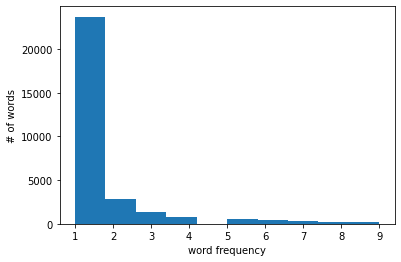

In [14]:
_ = plt.hist([v for v in sentiment['all'].values() if v < 10],bins=10)
plt.ylabel("# of words")
plt.xlabel("word frequency")

one_occur_count = len([v for v in sentiment['all'].values() if v == 1])
ten_plus_count = sum([v for v in sentiment['all'].values() if v >= 10])
total_words = sum([v for v in sentiment['all'].values()])
print('There are ' + str(one_occur_count) + ' words that only occur once')
print('There are ' + str(ten_plus_count) + ' words that occur more than 10x')

In [15]:
#Observing the words that occur once
unique_words = [k for k, v in sentiment['all'].items() if v == 1]
print(unique_words[:100])



['httpstcomdyjmf', 'httpstcoscnxyeahp', 'lizsalandar', 'sophiemcneill', 'effectsãââ', 'ridden', 'repwalterjones', 'openmigration', 'httpstcoihaefovcl', 'greghuntmp', 'rearing', 'transgndr', 'antisame', 'xmas', 'artwork', 'butterflies', 'glenclimate', 'cusson', 'sccscot', 'vocal', 'httpstcomauualpãââ', 'hxppyalien', 'agitatorclimate', 'illuminateboys', 'poln', 'httpstcosxajohmo', 'httpstcolislgcwzl', 'perish', 'httpstcovelnxt', 'booty', 'httpstcopicotcese', 'aleszubajak', 'ctg', 'rileypit', 'climatedeclaration', 'httpstcozhtoqmvv', 'parallels', 'httpstconunqszdfpy', 'pennykilkenny', 'booksellers', 'httpstcornngssose', 'ortega', 'chrismelberger', 'changeno', 'insists', 'httpstcobvedxhfnz', 'alleviate', 'plains', 'nearthe', 'allllll', 'exoanti_', 'httpstcoqtxtpihj', 'catfui', 'pointed', 'httpstcowsgdeanrzo', 'httpstcomkudtcu', 'jesusguerreroh', 'amkmusty', 'httpstcovhwlgud', 'httpstcovinndsd', 'davidschneider', 'httpstcowcqlpiaijc', 'dairyisscary', 'httpstcowbadixl', 'ãåâœâexhibit', 'agen

We will now see the percentage of unique words. If the percentage of unique words is too high, we will leave it in the data set. If the percentage is low, we will remove them, as it will not skew the data largely

In [16]:
#Computing the percentage of data that constitues words appearing more than 10 times
ten_plus_count/total_words


0.7972423501079062

From the observation above, we notice that 20% of the data constitues words that occur less than 10x. Using the result of this, we will remove all of the words that occur less than 10 times

In [20]:
#Removing all words from sentiment where they occur less than 10x
max_count = 10
remaining_word_index = [k for k, v in sentiment['all'].items() if v > max_count]
print(remaining_word_index)

['again', 'form', 'listen', 'happens', 'disappearing', 'storm', 'ivanka', 'falsely', 'part', 'joins', 'share', 'young', 'pruitt', 'disagree', 'ice', 'nothing', 'voting', 'cooperation', 'lack', 'pressure', 'puts', 'melting', 'wsj', 'love', 'beautiful', 'call', 'youve', 'nobody', 'deal', 'renewables', 'exists', 'ideas', 'workers', 'shit', 'earths', 'have', 'cbsnews', 'basically', 'reveal', 'taxpayers', 'break', 'increase', 'racist', 'natural', 'inequality', 'amid', 'join', 'retweet', 'priority', 'result', 'through', 'class', 'theeconomist', 'california', 'rather', 'brought', 'office', 'httpstcãââ', 'roguenasa', 'berniesanders', 'lets', 'forests', 'hes', 'trudeau', 'drive', 'dramatic', 'resilience', 'calling', 'ap', 'profit', 'collapse', 'interior', 'wildlife', 'aint', 'white', 'skepticism', 'longer', 'tweets', 'epa', 'httpãââ', 'e', 'feel', 'based', 'newscientist', 'earthhour', 'plus', 'stories', 'proud', 'truly', 'posts', 'putin', 'low', 'broke', 'generation', 'fuck', 'writes', 'sequel'

We use a Vector, called CountVectorizer to convert a collection of text in to token counts

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
df_clean = df_tr.copy()
X = df_clean['message']
y = df_clean['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Lets have a look at the distribution in our Y class

In [22]:
#We first need to seperate the data in to train test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

Now that we have analysed and prepared the data, we will start building some classification models.
We will use the following models in this predict:
- Logistic Regression 
- Nearest Neighbors 
- Linear SVM
- RBF SVM,          
- Random Forest

Once we build the models, we will get the following results for each model output:
- Classification Report
- Accuracy score
- Precision Score
- F1 score

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


# Random Forest Classifier
rf = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5, 
                                              n_estimators=100))])

# Naïve Bayes:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())])

# K-NN Classifier
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=5, 
                                             metric='minkowski', 
                                             p=2))])

# Logistic Regression
lr = Pipeline([('tfidf',TfidfVectorizer()),
               ('clf',LogisticRegression(C=1, 
                                         class_weight='balanced', 
                                         max_iter=1000))])
# Linear SVC:
lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC(class_weight='balanced'))])

In [28]:
results = []

# Random forest 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results.append(['Random Forest',metrics.accuracy_score(y_test,y_pred_rf),metrics.precision_score(y_test,y_pred_rf,average='weighted'),metrics.recall_score(y_test,y_pred_rf,average='weighted'),metrics.f1_score(y_test,y_pred_rf,average='weighted')])

# Niave bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
results.append(['Niave Bayes',metrics.accuracy_score(y_test,y_pred_nb),metrics.precision_score(y_test,y_pred_nb,average='weighted'),metrics.recall_score(y_test,y_pred_nb,average='weighted'),metrics.f1_score(y_test,y_pred_nb,average='weighted')])


# K - nearest neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results.append(['Nearest Neighbors',metrics.accuracy_score(y_test,y_pred_knn),metrics.precision_score(y_test,y_pred_knn,average='weighted'),metrics.recall_score(y_test,y_pred_knn,average='weighted'),metrics.f1_score(y_test,y_pred_knn,average='weighted')])


# Linear regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results.append(['Logistic Regression',metrics.accuracy_score(y_test,y_pred_lr),metrics.precision_score(y_test,y_pred_lr,average='weighted'),metrics.recall_score(y_test,y_pred_lr,average='weighted'),metrics.f1_score(y_test,y_pred_lr,average='weighted')])


# Linear SVC
lsvc.fit(X_train, y_train)
y_pred_lsvc = lsvc.predict(X_test)
results.append(['Linear SVM',metrics.accuracy_score(y_test,y_pred_lsvc),metrics.precision_score(y_test,y_pred_lsvc,average='weighted'),metrics.recall_score(y_test,y_pred_lsvc,average='weighted'),metrics.f1_score(y_test,y_pred_lsvc,average='weighted')])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Test'])
results.set_index('Classifier', inplace= True)
results.sort_values('F1 Test', ascending = False)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Precision,Recall,F1 Test
Classifier,,,,
Linear SVM,0.717498,0.705756,0.717498,0.709278
Logistic Regression,0.690794,0.698403,0.690794,0.691981
Nearest Neighbors,0.629656,0.616692,0.629656,0.618430
Niave Bayes,0.585032,0.671257,0.585032,0.483466
Random Forest,0.510541,0.509591,0.510541,0.345884


We are going to create a dataframe with the outcomes of the scoring, and we will be able to see which model performed the best, based on the various models


We are doing additional classification verification by implementing the confusion matrix as well as the classification report


In [30]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix

labels = ['-1: Anti' , '0: Neutral' , '1: Pro' , '2: News']

#Logistic Regression
df_LRCM = pd.DataFrame(data=confusion_matrix(y_test,y_pred_lr), index=labels, columns = labels)
print('Logistic Regression')
display(df_LRCM)

#Linear SVM
df_lsvmCM = pd.DataFrame(data=confusion_matrix(y_test,y_pred_lsvc), index=labels, columns = labels)
print('Linear SVM')
display(df_lsvmCM)


#Rand Forests
df_randCM = pd.DataFrame(data=confusion_matrix(y_test,y_pred_rf), index=labels, columns = labels)
print('Linear SVM')
display(df_randCM)

#KNN
df_nnCM = pd.DataFrame(data=confusion_matrix(y_test,y_pred_knn), index=labels, columns = labels)
print('Linear SVM')
display(df_nnCM)

#Niave bayes
df_nnNB = pd.DataFrame(data=confusion_matrix(y_test,y_pred_nb), index=labels, columns = labels)
print('Linear SVM')
display(df_nnNB)




Logistic Regression


,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,134,48,43,17
0: Neutral,45,207,146,45
1: Pro,82,181,1024,164
2: News,10,22,77,601


Linear SVM


,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,115,39,73,15
0: Neutral,37,174,190,42
1: Pro,45,107,1179,120
2: News,5,16,115,574


Linear SVM


,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,0,0,242,0
0: Neutral,0,0,443,0
1: Pro,0,0,1451,0
2: News,0,0,708,2


Linear SVM


,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,74,45,105,18
0: Neutral,39,136,242,26
1: Pro,47,137,1140,127
2: News,16,35,217,442


Linear SVM


,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,0,0,240,2
0: Neutral,0,14,426,3
1: Pro,0,0,1442,9
2: News,0,0,501,209


In [ ]:
#classification Report
print("logistic Regression")
print(classification_report(y_test, lr_pred, target_names=['-1: Anti' , '0: Neutral' , '1: Pro' , '2: News']))

print("Linear SVM")
print(classification_report(y_test, svclin_pred, target_names=['-1: Anti' , '0: Neutral' , '1: Pro' , '2: News']))

print("rbf SVM")
print(classification_report(y_test, svcrbf_pred, target_names=['-1: Anti' , '0: Neutral' , '1: Pro' , '2: News']))

print("Random Forests")
print(classification_report(y_test, rand_pred, target_names=['-1: Anti' , '0: Neutral' , '1: Pro' , '2: News']))

print("KNN")
print(classification_report(y_test, nn_pred, target_names=['-1: Anti' , '0: Neutral' , '1: Pro' , '2: News']))


From the validation scores above, we notice that the weighted average scores are on the low side. 
By understanding this, we can try to improve our models, by further analyzing data. 

From the above analysis, we will select the 2 best performing models, and try to make improvements on those

We will be using the following techniques to try and improve our model:
- Choosing K Best Features
- Hyper Parameter Tuning

In [ ]:
#Choosing K Best Features on the Logistical Model
from sklearn import feature_selection
from sklearn.feature_selection import f_classif

lm_kbest = LogisticRegression(solver='lbfgs')
selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k=8613)
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)
display(X_train_kbest.shape)
X_train.shape

#fit the k best model 
lm_kbest.fit(X_train_kbest, y_train)

#Converting test data as well
X_test_kbest = selector_kbest.transform(X_test)

#Performing the prediction
pred_lm_kbest = lm_kbest.predict(X_test_kbest)

#Assessing the prediction

print(classification_report(y_test, pred_lm_kbest, target_names=['-1: Anti' , '0: Neutral' , '1: Pro' , '2: News']))

In [35]:
# Retrain linear SVC using optimal hyperparameters:
lsvc_op = Pipeline([('tfidf', TfidfVectorizer(max_df=0.8,
                                                    min_df=2,
                                                    ngram_range=(1,2))),
                  ('clf', LinearSVC(C=0.3,
                                    class_weight='balanced',
                                    max_iter=3000))])
lsvc_op.fit(X_train,y_train)
final_pred = lsvc_op.predict(X_test)



After Tuning the hyper parameters of the best performing Model, we will compare the previous linear SVC score to test improvement


In [36]:
before_f1 = metrics.f1_score(y_test,y_pred_lr,average='weighted') 
after_f1 = metrics.f1_score(y_test,final_pred,average='weighted')

print (before_f1)
print (after_f1)

0.6919805550851696
0.7222422611653255


Now, we will use the best model, and do the submission

In [48]:
test = pd.read_csv('/kaggle/input/edsa-sentiment-classification/test.csv')
final_test = lsvc_op.predict(test['message'])
output = pd.DataFrame({'tweetid': test.tweetid,
                       'sentiment': final_test})
output.to_csv('C:\\Users\\abyj052\\OneDrive - Absa\\Yusuf Work\\Learning\\Data Science\\Advanced Classification\\Predict\\submission.csv', index=False)
output

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,2
10544,867455,0
